In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!cp /content/drive/MyDrive/DataMiningProject/ClusterPlus.py /content

In [52]:
!cp /content/drive/MyDrive/DataMiningProject/extra_graphs.py /content

In [53]:
import ClusterPlus
import math
import pandas as objpandas
import numpy as objnumpy
import matplotlib.pyplot as objplt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
import extra_graphs
import gc
from sklearn.metrics.cluster import silhouette_score, fowlkes_mallows_score, adjusted_mutual_info_score, normalized_mutual_info_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import datetime as objdatetime
from sklearn import svm
from sklearn import metrics

In [54]:
#Load the train data-set
train_dataset = objpandas.read_csv('/content/drive/MyDrive/weblog-analysis/Train.csv', encoding='unicode_escape', low_memory=False) 

#Print the count of rows and coulmns in csv file
print("Dimensions of Dataset: {}".format(train_dataset.shape))

Dimensions of Dataset: (5266, 16)


In [55]:
# Dropped all the Null, Empty, NA values from csv file 
train_new_dataset = train_dataset.dropna(axis=0, how='any') 

print("Dimensions of Dataset after Pre-processing : {}".format(train_new_dataset.shape))

print("Variable Type: \n", train_new_dataset.dtypes) 

Dimensions of Dataset after Pre-processing : (5266, 16)
Variable Type: 
 Unnamed: 0            int64
Date & Time          object
User IP              object
Method               object
Url                  object
Query String         object
Agent IP             object
Browser Type         object
OS                    int64
Url_Category          int64
Agent_IP_Category     int64
Login Type            int64
HTTP Status           int64
Test1                 int64
Win 32 Status         int64
Sub Status            int64
dtype: object


In [56]:
#Load the test data-set
test_dataset = objpandas.read_csv('/content/drive/MyDrive/weblog-analysis/Test.csv', encoding='unicode_escape', low_memory=False)

#Print the count of rows and coulmns in csv file
print("Dimensions of Dataset: {}".format(test_dataset.shape))

Dimensions of Dataset: (4, 15)


In [57]:
# Dropped all the Null, Empty, NA values from csv file 
test_new_dataset = test_dataset.dropna(axis=0, how='any') 

X = train_new_dataset.iloc[:,9:11]

print(X.head)

print("Dimensions of X : {}".format(X.shape))

<bound method NDFrame.head of       Url_Category  Agent_IP_Category
0               26                167
1               26                604
2               26                 55
3               20                874
4               31                984
...            ...                ...
5261            21                282
5262            23                282
5263            26                282
5264            20                247
5265            29                916

[5266 rows x 2 columns]>
Dimensions of X : (5266, 2)


In [58]:
Y = train_new_dataset['Url_Category']

# Value to predict
to_pedict = test_new_dataset.iloc[:,9:11]

collected = gc.collect()

print("Garbage collector: ", collected);

Garbage collector:  6347


In [59]:
#Function to convert the double to int
def getValues(value):
	
	print('Value::', value)
	
	if(int(value) >= 36):
		vals = math.floor(value)
	else:
		vals = math.floor(value+1)
	
	print('Value::', vals)
	
	df = x_dataset.loc[x_dataset['Url_Category'] == vals]	
	
	return df.iloc[0]['Url_Types']

In [60]:
#Load the Url data-set
x_dataset = objpandas.read_csv('/content/drive/MyDrive/weblog-analysis/Processed_13.csv', encoding='unicode_escape', low_memory=False) 


In [61]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

print(pca.components_)

print(pca.explained_variance_)

[[ 8.44453756e-05 -9.99999996e-01]
 [-9.99999996e-01 -8.44453756e-05]]
[1.20539918e+05 1.98543430e+01]


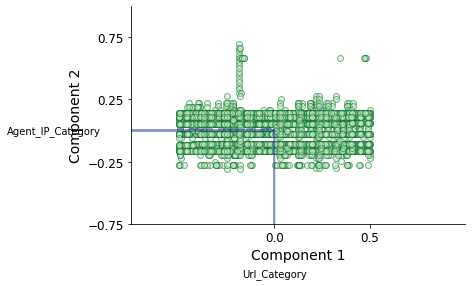

Garbage collector:  1980


In [62]:
# Transform samples using the PCA fit
pca_2d = pca.transform(X)

extra_graphs.biplot(pca_2d[:,0:2], objnumpy.transpose(pca.components_[0:2, :]), labels=X.columns)

collected = gc.collect()

print("Garbage collector: ", collected);

Mini Batch K-Means Response Time: 559517


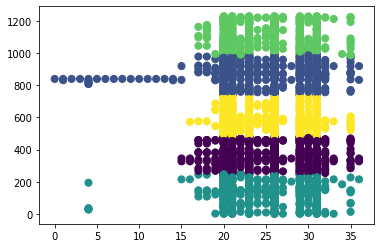

Mini Batch K-Means Predict Value:  [2 4 2 3]
*****************************************Mini Batch K-Means Algorithm*****************************
Silhouette Score: 0.55
Fowlkes-Mallows Score: 0.16
Adjusted Mutual Information Score: 0.0
Mutual Information Based Score: 0.01
Adjusted Rand Index Score: 0.0
**************************************************************************************


In [63]:
minibatch_start_time = objdatetime.datetime.now()

minibatch = MiniBatchKMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit
minibatch.fit(X)

# Predict
minibatch_predict = minibatch.predict(X)

minibatch_end_time = minibatch_start_time - objdatetime.datetime.now()

print("Mini Batch K-Means Response Time:", minibatch_end_time.microseconds)

objplt.scatter(X['Url_Category'], X['Agent_IP_Category'], c = minibatch_predict, s = 50);
objplt.show();

print("Mini Batch K-Means Predict Value: ", minibatch.predict(to_pedict));

print("*****************************************Mini Batch K-Means Algorithm*****************************");

mini_silhouette_score = silhouette_score(X, minibatch_predict, metric = 'euclidean') #HIGH

print("Silhouette Score:", round(mini_silhouette_score, 2))

mini_fowlkes_mallows_score = fowlkes_mallows_score(Y, minibatch_predict) #EQUAL OR HIGH

print("Fowlkes-Mallows Score:", round(mini_fowlkes_mallows_score, 2))

mini_adjusted_mutual_info_score = adjusted_mutual_info_score(Y, minibatch_predict)

print("Adjusted Mutual Information Score:", round(mini_adjusted_mutual_info_score, 2))

mini_normalized_mutual_info_score = normalized_mutual_info_score(Y, minibatch_predict)

print("Mutual Information Based Score:", round(mini_normalized_mutual_info_score, 2))

mini_adjusted_rand_score = adjusted_rand_score(Y, minibatch_predict)

print("Adjusted Rand Index Score:", round(mini_adjusted_rand_score, 2))

print("**************************************************************************************");

In [64]:
collected = gc.collect()

print("Garbage collector: ", collected);

Garbage collector:  2560


In [65]:
clusterPlus_start_time = objdatetime.datetime.now()

# Define the model
clusterPlus = ClusterPlus.ClusterPlus(n_clusters=5, max_iter=600, n_init=100, random_state=10)

# Fit
clusterPlus.fit(X)

# Predict
clusterPlus_predict = clusterPlus.predict(X)

clusterPlus_end_time = clusterPlus_start_time - objdatetime.datetime.now()

print("Cluster Plus Response Time:", clusterPlus_end_time.microseconds)

print("Cluster Plus Predict Value: ", clusterPlus.predict(to_pedict));

cluster_Names= {"0" : "1", "1" : "2", "2" : "3", "3" : "4", "4" : "5"}

train_dataset["Cluster Names"] = [cluster_Names[str(i)] for i in minibatch_predict]

#Save the data to csv file
train_dataset.to_csv('/content/drive/MyDrive/weblog-analysis/Train_Classfication.csv', encoding='utf-8')

print("****************************Cluster Plus Algorithm*****************************");

clusterPlus_silhouette_score = silhouette_score(X, clusterPlus_predict, metric = 'euclidean')

print("Silhouette Score:", round(clusterPlus_silhouette_score, 2))

clusterPlus_fowlkes_mallows_score = fowlkes_mallows_score(Y, clusterPlus_predict)

print("Fowlkes-Mallows Score:", round(clusterPlus_fowlkes_mallows_score, 2))

clusterPlus_adjusted_mutual_info_score = adjusted_mutual_info_score(Y, clusterPlus_predict)

print("Adjusted Mutual Information Score:", round(clusterPlus_adjusted_mutual_info_score, 2))	

clusterPlus_normalized_mutual_info_score = normalized_mutual_info_score(Y, clusterPlus_predict)

print("Mutual Information Based Score:", round(clusterPlus_normalized_mutual_info_score, 2))

clusterPlus_adjusted_rand_score = adjusted_rand_score(Y, clusterPlus_predict) 

print("Adjusted Rand Index Score:", round(clusterPlus_adjusted_rand_score, 2))

print("**************************************************************************************");

Cluster Plus Response Time: 806177
Cluster Plus Predict Value:  [3 2 3 1]
****************************Cluster Plus Algorithm*****************************
Silhouette Score: 0.56
Fowlkes-Mallows Score: 0.16
Adjusted Mutual Information Score: 0.0
Mutual Information Based Score: 0.01
Adjusted Rand Index Score: 0.0
**************************************************************************************


In [66]:
collected = gc.collect()

print("Garbage collector: ", collected);

Garbage collector:  50


In [67]:
X = train_dataset.iloc[:,9:11]
Y = train_dataset['Url_Category']

#Training the input dataset
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (3949, 2)
Training Labels Shape: (3949,)
Testing Features Shape: (1317, 2)
Testing Labels Shape: (1317,)


In [68]:
r_start_time = objdatetime.datetime.now()

# Random Forest Algorithm
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Calling Fit Method
rf.fit(train_features, train_labels);

# Value to predict
to_pedict = test_new_dataset.iloc[:,9:11]

# Calling Predict Method
rPrediction = rf.predict(test_features) #Train Data
#rPrediction = rf.predict(to_pedict) #Test Data

r_end_time = r_start_time - objdatetime.datetime.now()

print("Random Forest Response Time:", r_end_time.microseconds)

# Iterating the predictions
for value in rPrediction:

	print("Random Forest Predictions: ", getValues(value));

s_start_time = objdatetime.datetime.now()

Random Forest Response Time: 894752
Value:: 24.0
Value:: 25
Random Forest Predictions:  /wap/list_ajax.asp
Value:: 23.0
Value:: 24
Random Forest Predictions:  /wap/list.asp
Value:: 23.0
Value:: 24
Random Forest Predictions:  /wap/list.asp
Value:: 20.0
Value:: 21
Random Forest Predictions:  /wap/init.asp
Value:: 29.0
Value:: 30
Random Forest Predictions:  /wap/prev.asp
Value:: 29.0
Value:: 30
Random Forest Predictions:  /wap/prev.asp
Value:: 22.0
Value:: 23
Random Forest Predictions:  /wap/lastread.asp
Value:: 31.0
Value:: 32
Random Forest Predictions:  /wap/record.asp
Value:: 31.0
Value:: 32
Random Forest Predictions:  /wap/record.asp
Value:: 23.0
Value:: 24
Random Forest Predictions:  /wap/list.asp
Value:: 23.0
Value:: 24
Random Forest Predictions:  /wap/list.asp
Value:: 26.0
Value:: 27
Random Forest Predictions:  /wap/login.asp
Value:: 31.0
Value:: 32
Random Forest Predictions:  /wap/record.asp
Value:: 20.0
Value:: 21
Random Forest Predictions:  /wap/init.asp
Value:: 20.0
Value:: 21


In [69]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(train_features, train_labels)

# Value to predict
to_pedict = test_new_dataset.iloc[:,9:11]

#Predict the response for test dataset
sPrediction = clf.predict(test_features) #Train Data
#sPrediction = clf.predict(to_pedict) #Test Data

s_end_time = s_start_time - objdatetime.datetime.now()

print("SVM Response Time:", s_end_time.microseconds)

# Iterating the predictions
for value in sPrediction:

	print("SVM Predictions: ", getValues(value));

SVM Response Time: 514863
Value:: 24
Value:: 25
SVM Predictions:  /wap/list_ajax.asp
Value:: 23
Value:: 24
SVM Predictions:  /wap/list.asp
Value:: 23
Value:: 24
SVM Predictions:  /wap/list.asp
Value:: 20
Value:: 21
SVM Predictions:  /wap/init.asp
Value:: 29
Value:: 30
SVM Predictions:  /wap/prev.asp
Value:: 29
Value:: 30
SVM Predictions:  /wap/prev.asp
Value:: 22
Value:: 23
SVM Predictions:  /wap/lastread.asp
Value:: 31
Value:: 32
SVM Predictions:  /wap/record.asp
Value:: 31
Value:: 32
SVM Predictions:  /wap/record.asp
Value:: 23
Value:: 24
SVM Predictions:  /wap/list.asp
Value:: 23
Value:: 24
SVM Predictions:  /wap/list.asp
Value:: 26
Value:: 27
SVM Predictions:  /wap/login.asp
Value:: 31
Value:: 32
SVM Predictions:  /wap/record.asp
Value:: 20
Value:: 21
SVM Predictions:  /wap/init.asp
Value:: 20
Value:: 21
SVM Predictions:  /wap/init.asp
Value:: 21
Value:: 22
SVM Predictions:  /wap/is.asp
Value:: 23
Value:: 24
SVM Predictions:  /wap/list.asp
Value:: 31
Value:: 32
SVM Predictions:  /w

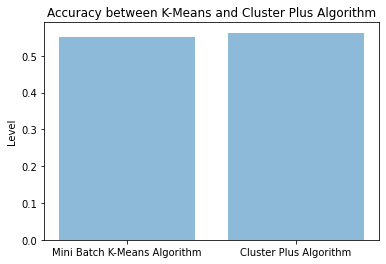

In [70]:
data = [mini_silhouette_score, clusterPlus_silhouette_score]

x_position = ('Mini Batch K-Means Algorithm', 'Cluster Plus Algorithm')

y_position = objnumpy.arange(len(x_position))

objplt.bar(y_position, data, align='center', alpha=0.5)
objplt.xticks(y_position, x_position)
objplt.ylabel('Level')
objplt.title('Accuracy between K-Means and Cluster Plus Algorithm')

objplt.show()

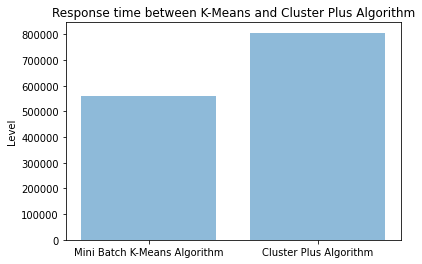

In [71]:
data = [minibatch_end_time.microseconds, clusterPlus_end_time.microseconds]

x_position = ('Mini Batch K-Means Algorithm', 'Cluster Plus Algorithm')

y_position = objnumpy.arange(len(x_position))

objplt.bar(y_position, data, align='center', alpha=0.5)
objplt.xticks(y_position, x_position)
objplt.ylabel('Level')
objplt.title('Response time between K-Means and Cluster Plus Algorithm')

objplt.show()

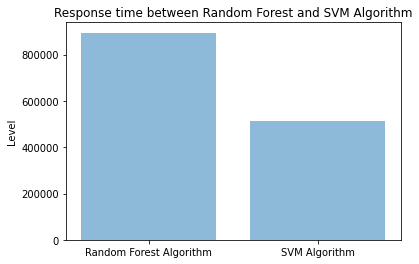

In [72]:
data = [r_end_time.microseconds, s_end_time.microseconds]

x_position = ('Random Forest Algorithm', 'SVM Algorithm')

y_position = objnumpy.arange(len(x_position))

objplt.bar(y_position, data, align='center', alpha=0.5)
objplt.xticks(y_position, x_position)
objplt.ylabel('Level')
objplt.title('Response time between Random Forest and SVM Algorithm')

objplt.show()